In [25]:
import perceval as pcvl
from perceval.polyquantique.algorithm.BasicStateJitter import BasicStateJitter,Source
from perceval.polyquantique.algorithm.ProcessorJitter import ProcessorJitter
from perceval.polyquantique.algorithm.DistributionEnvelope import Schmidt
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc 

### Create base vector

In [26]:
source = Source(["Dirac",1],["Gaussian",1])
state = "|1,1>"
of0 = np.array([0,1])
bv = BasicStateJitter(state,offset=of0,source=source)

### Print vector input and new base

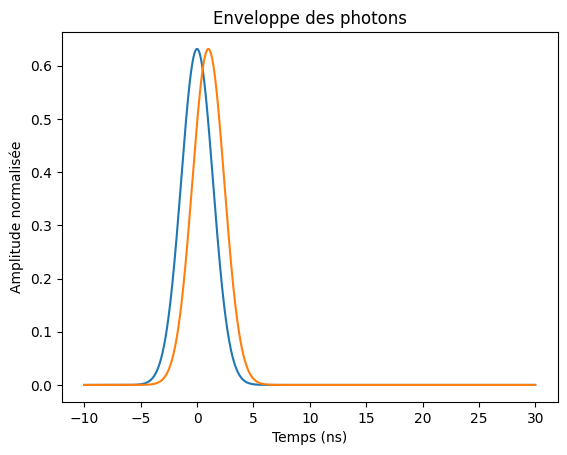

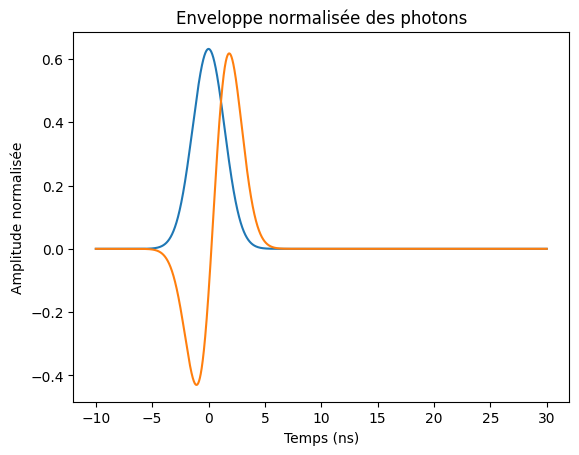

In [27]:
bv.print_vect()

### Coefficient matrix

In [28]:
print(bv.coef_matrix)

[[1.         0.        ]
 [0.8824969  0.47031821]]


### States used and coefficient associated

In [29]:
print(bv.coef_list )
print(bv.bs_vector)

[0.77880078 0.22119922 0.         0.        ]
[[(1, 1), (0, 0)], [(1, 0), (0, 1)], [(0, 1), (1, 0)], [(0, 0), (1, 1)]]


### Create HOM circuit

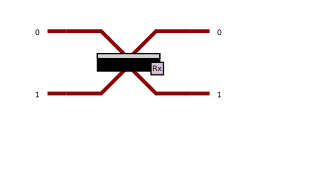

In [30]:
circuitHOM = pcvl.Circuit(2)
circuitHOM.add((0,1), pcvl.BS())
pcvl.pdisplay(circuitHOM)

### Use processor on HOM

In [31]:
processor = pcvl.Processor("Naive",circuitHOM)
Pj = ProcessorJitter(bv,processor)
pcvl.pdisplay(Pj.analyser)
Pj.print_output()

,"|0,0>","|0,1>","|1,0>","|2,0>","|1,1>","|0,2>"
"|0,0>",0,0,0,0,0,0
"|0,1>",0,1/2,1/2,0,0,0
"|1,0>",0,1/2,1/2,0,0,0
"|1,1>",0,0,0,1/2,0,1/2


|2,0> [0.4447002]
|1,1> [0.11059961]
|0,2> [0.4447002]
Probabilite totale = 0.999999999999999


In [32]:
HOM = 1-2*Pj.output_prob[4][0]
print('HOM = ', HOM)

HOM =  0.7788007830714051
